In [4]:
from matplotlib import pyplot as plt
import daft

In [30]:
def dh_add_node(pgm, name, label, r, c,scale=1.3,aspect=1):
    ''' add a node to a PGM, using Doeke's (row, column) coordinates 
 
    Keyword arguments:
    pgm   -- daft PGM object to add a node to
    name  -- name of the node to add
    label -- label that will be displayed in the node
    r     -- horizontal (row) coordinate
    c     -- vertical (column) coordinate
    scale -- scale of each node--bigger is more readable (default: 1.5)
    aspect-- wdith:height ratio (default: 1)
    '''
    c=1.25*c
    pgm.add_node(name, label, c, 3-r, scale=scale,aspect=aspect) 
    return

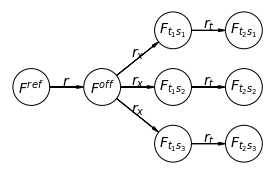

In [42]:
# 
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref",      r"$F^{ref}$",     2,1)
dh_add_node(pgm_1, "Foff",      r"$F^{off}$",     2,2)
dh_add_node(pgm_1, "Fon_t1_s1", r"$F_{t_1 s_1}$", 1,3)
dh_add_node(pgm_1, "Fon_t2_s1", r"$F_{t_2 s_1}$", 1,4)
dh_add_node(pgm_1, "Fon_t1_s2", r"$F_{t_1 s_2}$", 2,3)
dh_add_node(pgm_1, "Fon_t2_s2", r"$F_{t_2 s_2}$", 2,4)
dh_add_node(pgm_1, "Fon_t1_s3", r"$F_{t_1 s_3}$", 3,3)
dh_add_node(pgm_1, "Fon_t2_s3", r"$F_{t_2 s_3}$", 3,4)

pgm_1.add_edge("Fref", "Foff"    ,       label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s1",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s2",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon_t1_s3",      label=r"$r_x$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s1", "Fon_t2_s1", label=r"$r_t$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s2", "Fon_t2_s2", label=r"$r_t$", label_params={'fontsize':14})
pgm_1.add_edge("Fon_t1_s3", "Fon_t2_s3", label=r"$r_t$", label_params={'fontsize':14})

pgm_1.render()
plt.show()

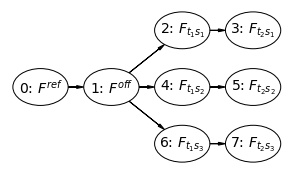

In [31]:
# 
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref",      r"0: $F^{ref}$",     2,1,aspect=1.5)
dh_add_node(pgm_1, "Foff",      r"1: $F^{off}$",     2,2,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s1", r"2: $F_{t_1 s_1}$", 1,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s1", r"3: $F_{t_2 s_1}$", 1,4,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s2", r"4: $F_{t_1 s_2}$", 2,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s2", r"5: $F_{t_2 s_2}$", 2,4,aspect=1.5)
dh_add_node(pgm_1, "Fon_t1_s3", r"6: $F_{t_1 s_3}$", 3,3,aspect=1.5)
dh_add_node(pgm_1, "Fon_t2_s3", r"7: $F_{t_2 s_3}$", 3,4,aspect=1.5)

pgm_1.add_edge("Fref", "Foff")
pgm_1.add_edge("Foff", "Fon_t1_s1")
pgm_1.add_edge("Foff", "Fon_t1_s2")
pgm_1.add_edge("Foff", "Fon_t1_s3")
pgm_1.add_edge("Fon_t1_s1", "Fon_t2_s1")
pgm_1.add_edge("Fon_t1_s2", "Fon_t2_s2")
pgm_1.add_edge("Fon_t1_s3", "Fon_t2_s3")

pgm_1.render()
plt.show()

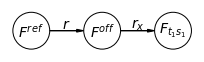

In [43]:
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "Fref", r"$F^{ref}$",     1,1)
dh_add_node(pgm_1, "Foff", r"$F^{off}$",     1,2)
dh_add_node(pgm_1, "Fon",  r"$F_{t_1 s_1}$", 1,3)

pgm_1.add_edge("Fref", "Foff",  label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("Foff", "Fon" ,  label=r"$r_x$", label_params={'fontsize':14})

pgm_1.render()
plt.show()

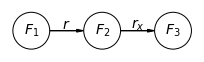

In [45]:
pgm_1 = daft.PGM(label_params={'fontsize':14})
dh_add_node(pgm_1, "F1", r"$F_1$", 1,1)
dh_add_node(pgm_1, "F2", r"$F_2$", 1,2)
dh_add_node(pgm_1, "F3", r"$F_3$", 1,3)

pgm_1.add_edge("F1", "F2",  label=r"$r$",   label_params={'fontsize':14})
pgm_1.add_edge("F2", "F3",  label=r"$r_x$", label_params={'fontsize':14})

pgm_1.render()
plt.show()